In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
bigp = [
    'BNP', 'Jamaat', 'JaPa', 'Islami Andolan Bangladesh',
    'GOP (Nuru)', 'Bangladesh Khelafat Majlish', 'Khelafat Majlish',
    'CPB', 'AB Party', 'NCP', 'Independent'
]
mainp = ['BNP', 'Jamaat', 'JaPa', 'NCP', 'Independent']

In [3]:
bdmap = gpd.read_file('map/seats.shp')
bdmap.head()

,seat_no,seat,district,division,region,shape_len,shape_area,geometry
0,1,Panchagarh-1,Panchagarh,Rangpur,Urban,2.787812,0.061199,"POLYGON ((88.72746 26.34527, 88.72772 26.34494..."
1,2,Panchagarh-2,Panchagarh,Rangpur,Rural,1.411258,0.064286,"POLYGON ((88.76158 26.30059, 88.76176 26.29971..."
2,3,Thakurgaon-1,Thakurgaon,Rangpur,Urban,1.255212,0.058832,"POLYGON ((88.55589 26.17948, 88.55684 26.17788..."
3,4,Thakurgaon-2,Thakurgaon,Rangpur,Rural,1.858839,0.045806,"POLYGON ((88.32191 26.20205, 88.3222 26.20129,..."
4,5,Thakurgaon-3,Thakurgaon,Rangpur,Rural,1.810654,0.059069,"POLYGON ((88.25475 26.03583, 88.25828 26.03391..."


In [4]:
dfa = pd.read_csv('data/affidavit.csv')
dfa = dfa[['filename', 'name_bn', 'zillaID', 'constituencyID', 'income', 'tax', 'wealth', 'party']]
dfa.head()

,filename,name_bn,zillaID,constituencyID,income,tax,wealth,party
0,"1,109,মশিউর রহমান.txt",মশিউর রহমান,1,109,NaN,NaN,NaN,Independent
1,"1,109,মোঃ অলি উল্লাহ.txt",মোঃ অলি উল্লাহ,1,109,800000.0,45000.0,NaN,Islami Andolan Bangladesh
2,"1,109,মোঃ জামাল হোসাইন.txt",মোঃ জামাল হোসাইন,1,109,5000.0,5000.0,713000.0,JP (Manju)
3,"1,109,মোঃ জাহাঙ্গীর হোসাইন.txt",মোঃ জাহাঙ্গীর হোসাইন,1,109,471500.0,7150.0,3890900.0,Khelafat Majlish
4,"1,109,মোঃ মুহিব্বুল্যাহ.txt",মোঃ মুহিব্বুল্যাহ,1,109,NaN,NaN,NaN,Jamaat


In [5]:
dfa.shape

(2446, 8)

In [6]:
dfmainp = dfa[dfa['party'].isin(mainp)]
dfmainp.head()

,filename,name_bn,zillaID,constituencyID,income,tax,wealth,party
0,"1,109,মশিউর রহমান.txt",মশিউর রহমান,1,109,NaN,NaN,NaN,Independent
4,"1,109,মোঃ মুহিব্বুল্যাহ.txt",মোঃ মুহিব্বুল্যাহ,1,109,NaN,NaN,NaN,Jamaat
5,"1,109,মোঃ নজরুল ইসলাম মোল্লা.txt",মোঃ নজরুল ইসলাম মোল্লা,1,109,NaN,251.0,NaN,BNP
6,"1,110,আবদুল লতিফ ফরাজী.txt",আবদুল লতিফ ফরাজী,1,110,401241.0,3958.0,NaN,JaPa
7,"1,110,ডাঃ সুলতান আহমদ.txt",ডাঃ সুলতান আহমদ,1,110,2807193.0,446798.0,NaN,Jamaat


In [7]:
dfmainp_q = dfmainp.groupby('party')['wealth'].quantile([0.25, 0.75]).unstack()
dfmainp_q

,0.25,0.75
party,,
BNP,9764800.00,77587748.00
Independent,3047500.00,40904008.50
JaPa,2002000.00,12360000.00
Jamaat,3005606.00,10404386.00
NCP,3500389.25,8315294.75


In [8]:
def iqr_flag(row):
    Q1 = dfmainp_q.at[row.party, 0.25]
    Q3 = dfmainp_q.at[row.party, 0.75]
    if (row.wealth > Q1) & (row.wealth < Q3):
        return True
    return False

dfmainp['iqr_flag'] = dfmainp.apply(iqr_flag, axis=1)
dfmainp.head()

C:\Users\matus\AppData\Local\Temp\ipykernel_8720\4075310895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmainp['iqr_flag'] = dfmainp.apply(iqr_flag, axis=1)


,filename,name_bn,zillaID,constituencyID,income,tax,wealth,party,iqr_flag
0,"1,109,মশিউর রহমান.txt",মশিউর রহমান,1,109,NaN,NaN,NaN,Independent,False
4,"1,109,মোঃ মুহিব্বুল্যাহ.txt",মোঃ মুহিব্বুল্যাহ,1,109,NaN,NaN,NaN,Jamaat,False
5,"1,109,মোঃ নজরুল ইসলাম মোল্লা.txt",মোঃ নজরুল ইসলাম মোল্লা,1,109,NaN,251.0,NaN,BNP,False
6,"1,110,আবদুল লতিফ ফরাজী.txt",আবদুল লতিফ ফরাজী,1,110,401241.0,3958.0,NaN,JaPa,False
7,"1,110,ডাঃ সুলতান আহমদ.txt",ডাঃ সুলতান আহমদ,1,110,2807193.0,446798.0,NaN,Jamaat,False


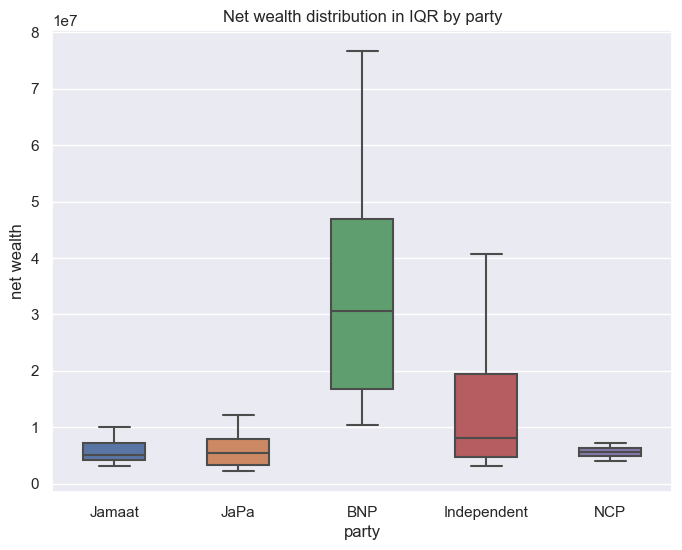

In [9]:
# plot distribution of net wealth in inter quartile range by party
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfmainp[dfmainp['iqr_flag']==True], x="party", y="wealth", width=.5, ax=ax)
ax.set_title('Net wealth distribution in IQR by party')
ax.set_ylabel('net wealth')
fig.savefig('fig/affidavit_wealth_distn_by_party',bbox_inches='tight')

### comparison of median wealth, income and tax paid among parties

In [11]:
dfmainp_med = dfmainp[['party', 'wealth', 'income', 'tax']].dropna().groupby('party').median().stack().reset_index()
dfmainp_med.columns = ['party', 'metric', 'value']
dfmainp_med.head()

,party,metric,value
0,BNP,wealth,30639043.0
1,BNP,income,2160553.0
2,BNP,tax,151890.0
3,Independent,wealth,6603000.0
4,Independent,income,664000.0


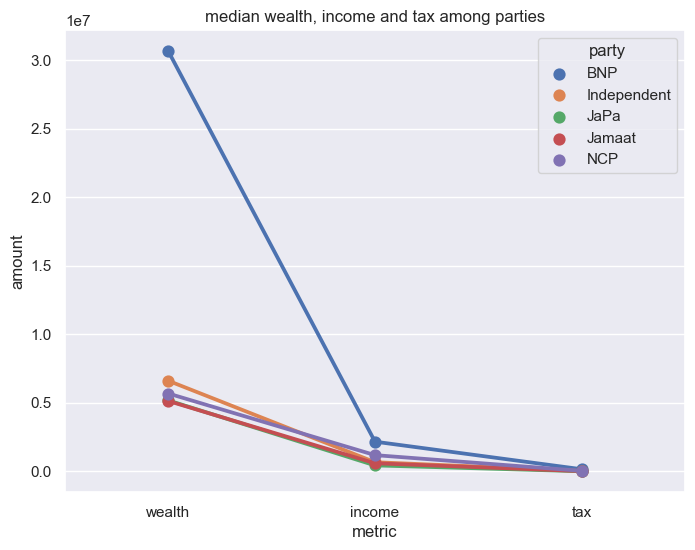

In [12]:
# plot comparison of wealth, income and tax among parties
fig, ax = plt.subplots(figsize=(8, 6))
sns.pointplot(data=dfmainp_med, x="metric", y="value", hue="party")
ax.set_title('median wealth, income and tax among parties')
ax.set_ylabel('amount')
fig.savefig('fig/affidavit_comparison_wealth_income_tax_by_party',bbox_inches='tight')

### percentage of tax paid out of net income for each party

In [13]:
dfps = dfmainp[['party', 'tax', 'income']].dropna()
dfps.shape

(552, 3)

In [14]:
dfps['tax_perc'] = dfps['tax'] / dfps['income']
dfps = dfps.sort_values(by='tax_perc', ascending=False)
dfps.head()

,party,tax,income,tax_perc
1869,BNP,90000.0,90000.0,1.000000
1393,JaPa,50000.0,50000.0,1.000000
1083,Independent,200000.0,200000.0,1.000000
2109,Independent,3683355.0,4003780.0,0.919969
1151,Independent,1100130.0,1252708.0,0.878201


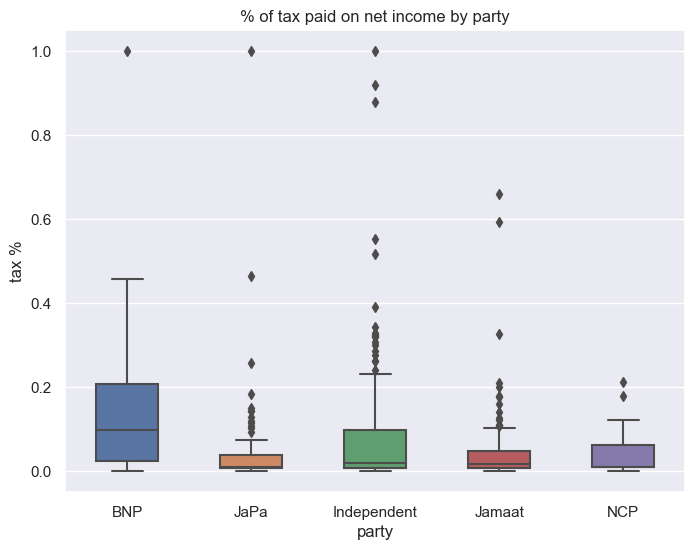

In [15]:
# plot distribution of % of tax paid on net income by party
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfps, x="party", y="tax_perc", width=.5, ax=ax)
ax.set_title('% of tax paid on net income by party')
ax.set_ylabel('tax %')
fig.savefig('fig/affidavit_tax_perc_by_party',bbox_inches='tight')

### percentage of net income out of total wealth for each party

In [16]:
dfsw = dfmainp[['party', 'income', 'wealth']].dropna()
dfsw.shape

(304, 3)

In [17]:
dfsw['income_perc'] = dfsw['income'] / dfsw['wealth']
dfsw = dfsw.sort_values(by='income_perc', ascending=False)
dfsw.head()

,party,income,wealth,income_perc
881,Independent,36270156.0,36845653.0,0.984381
1081,Independent,14395000.0,14764322.0,0.974986
1475,NCP,5090000.0,5232040.0,0.972852
1327,Independent,9665195.0,11206062.0,0.862497
1420,BNP,5092070.0,5922323.0,0.859810


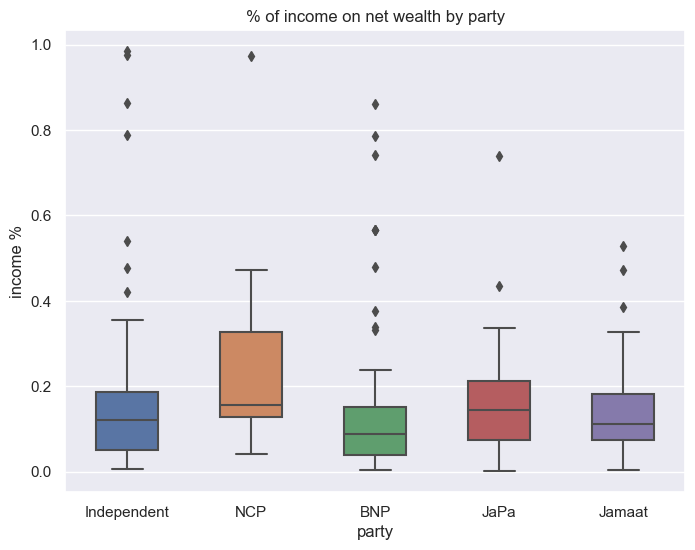

In [18]:
# plot distribution of % of income on net wealth by party
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=dfsw, x="party", y="income_perc", width=.5, ax=ax)
ax.set_title('% of income on net wealth by party')
ax.set_ylabel('income %')
fig.savefig('fig/affidavit_income_perc_by_party',bbox_inches='tight')